In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [74]:
df = yf.download('MSFT', start = '2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [75]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,80.940399,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,81.317055,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,82.032776,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,83.049835,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,83.134575,22113000
...,...,...,...,...,...,...
2022-12-19,244.860001,245.210007,238.710007,240.449997,240.449997,29696400
2022-12-20,239.399994,242.910004,238.419998,241.800003,241.800003,25150800
2022-12-21,241.690002,245.619995,240.110001,244.429993,244.429993,23690600


In [76]:
df = df.reset_index()
df.index = df.pop('Date')

In [85]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,80.940399,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,81.317055,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,82.032776,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,83.049835,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,83.134575,22113000
...,...,...,...,...,...,...
2022-12-19,244.860001,245.210007,238.710007,240.449997,240.449997,29696400
2022-12-20,239.399994,242.910004,238.419998,241.800003,241.800003,25150800
2022-12-21,241.690002,245.619995,240.110001,244.429993,244.429993,23690600


In [97]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [86]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [95]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,193.703291,195.737084,191.539307,193.732550,189.981275,3.025246e+07
std,74.686154,75.455615,73.846003,74.689213,75.606895,1.287695e+07
min,86.059998,86.309998,83.830002,85.010002,80.055168,8.989200e+06
25%,119.224998,119.804996,118.449997,119.320000,114.798794,2.219930e+07
50%,199.850006,203.250000,196.559998,200.589996,196.561340,2.701870e+07
75%,256.180008,259.279999,253.010002,255.470001,253.374657,3.437195e+07
max,344.619995,349.670013,342.200012,343.109985,339.924835,1.112421e+08


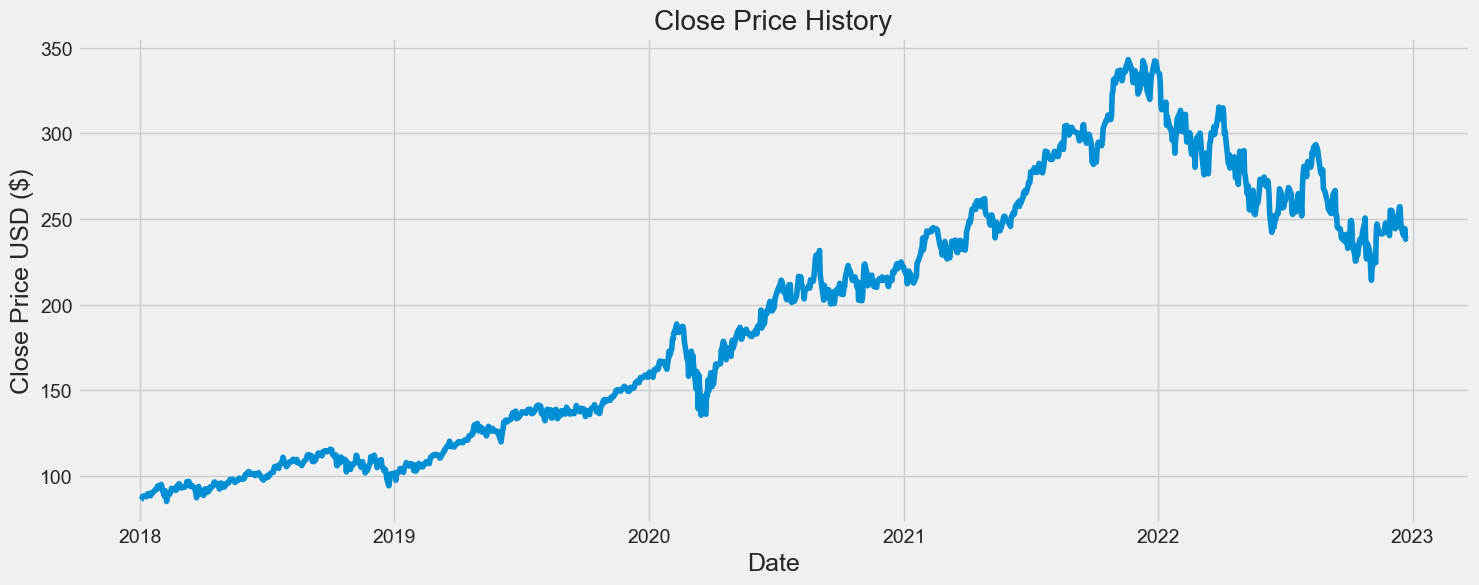

In [78]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [79]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1193

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00364198],
       [0.00519177],
       [0.00813638],
       ...,
       [0.61766757],
       [0.59349093],
       [0.59558312]])

In [81]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00364198, 0.00519177, 0.00813638, 0.01232081, 0.0126695 ,
       0.01243704, 0.01088724, 0.01189461, 0.01778379, 0.01294071,
       0.01987601, 0.01972103, 0.01933358, 0.02557148, 0.02669508,
       0.02638511, 0.0283611 , 0.03506391, 0.03452149, 0.02994962,
       0.03874468, 0.03583882, 0.02623013, 0.01158465, 0.02448663,
       0.01782254, 0.        , 0.01228205, 0.01596279, 0.01867493,
       0.02247189, 0.02963968, 0.02708252, 0.02987214, 0.02510653,
       0.02603643, 0.03506391, 0.04033319, 0.03560634, 0.03394031,
       0.03037581, 0.03115072, 0.03343664, 0.03219682, 0.03428903,
       0.03649748, 0.04467261, 0.04556372, 0.03642   , 0.03425028,
       0.03552886, 0.03715613, 0.03053079, 0.03146066, 0.02894228,
       0.01851995, 0.00840759, 0.03397907, 0.01728012, 0.01697016])]
[0.024254145346507994]

[array([0.00364198, 0.00519177, 0.00813638, 0.01232081, 0.0126695 ,
       0.01243704, 0.01088724, 0.01189461, 0.01778379, 0.01294071,
       0.01987601, 0.01972103, 0.0

In [82]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

1133/1133 [==============================] - 18s 14ms/step - loss: 0.0024


In [83]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 18ms/step


8.63878897190424

C:\Users\taner\AppData\Local\Temp\ipykernel_5904\453811707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


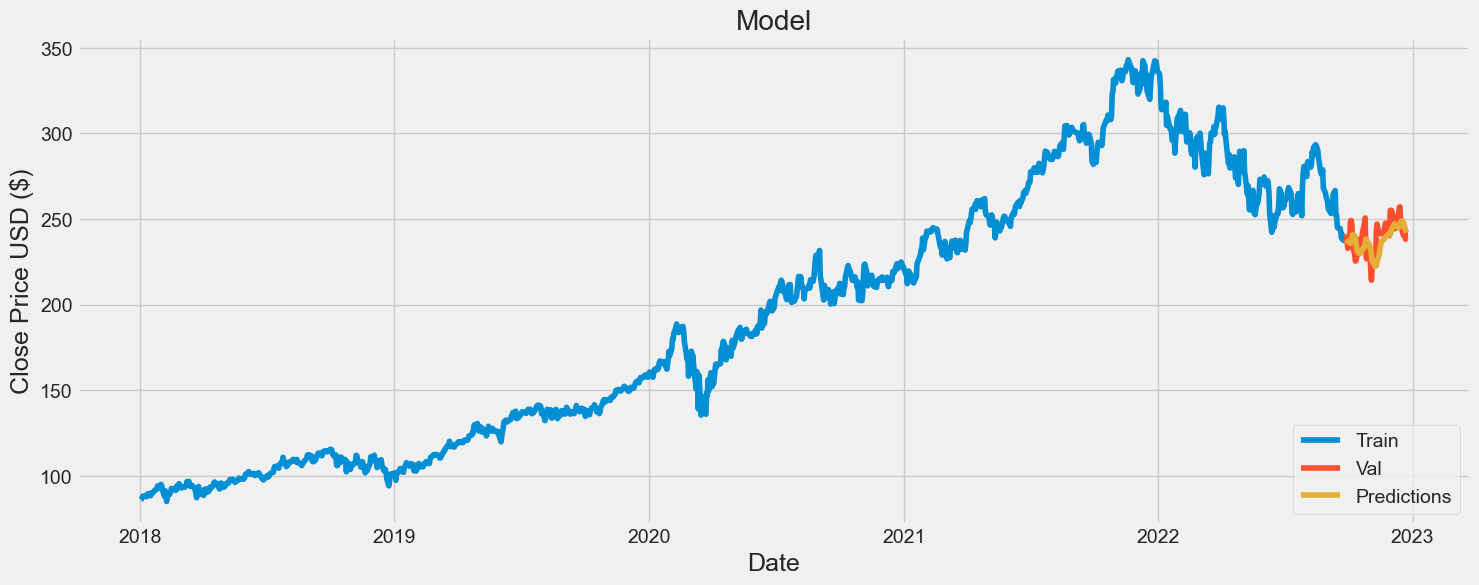

In [84]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
